Para classificarmos novos registros, precisamos ter uma base de dados histórica para que o modelo seja treinado em prol de classificar novos registros 

### Introdução ao Algoritmo Naïve Bayes
Cria uma tabela de aprendizagem (probabilidade)

In [1]:
import pandas as pd
import random 
import numpy as np

In [2]:
dataset = pd.read_csv('../Bases de dados/credit_data.csv')
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [3]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


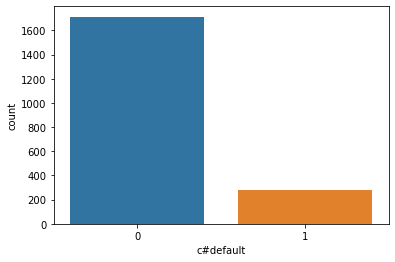

In [4]:
import seaborn as sns # usado para visualização
sns.countplot(dataset['c#default']);
# base de dados está desbalanceada.

In [5]:
# atributos previsores

X = dataset.iloc[:, 1:4].values

In [6]:
X.shape

(1997, 3)

In [7]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [8]:
y = dataset.iloc[:, 4].values

In [9]:
y.shape

(1997,)

In [10]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### Divisão e Treinamento da Base de Dados

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, stratify = y)

In [13]:
X_treinamento.shape, y_treinamento.shape # precisam estar iguais

((1597, 3), (1597,))

In [14]:
X_teste.shape, y_teste.shape

((400, 3), (400,))

In [15]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [16]:
1714 / len(dataset), 283 / len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [17]:
np.unique(y_treinamento, return_counts=True)

(array([0, 1], dtype=int64), array([1371,  226], dtype=int64))

In [18]:
226 / len(y_treinamento)

0.14151534126487164

In [19]:
np.unique(y_teste, return_counts=True)

(array([0, 1], dtype=int64), array([343,  57], dtype=int64))

In [20]:
57 / len(y_teste)

0.1425

### Algoritmo Naïve Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

In [23]:
previsoes = modelo.predict(X_teste)

In [24]:
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
y_teste

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(previsoes, y_teste)

0.9275

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(previsoes, y_teste)
cm

array([[339,  25],
       [  4,  32]], dtype=int64)

<AxesSubplot:>

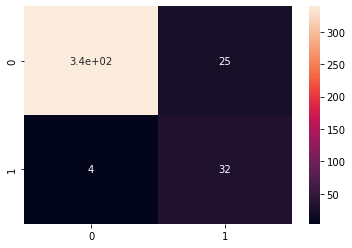

In [30]:
sns.heatmap(cm, annot=True)

In [31]:
# Percentual de acerto para as pessoas que pagam o emprestimo

338 / (338 + 20)

0.9441340782122905

In [32]:
32 / (32 + 7)

0.8205128205128205

### Undersampling & Oversampling

In [33]:
# implementação do Tomek links

from imblearn.under_sampling import TomekLinks

In [34]:
tl = TomekLinks() # segundo a documentação, não tem mais os argumentos
X_under, y_under = tl.fit_resample(X, y)

In [35]:
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [36]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [37]:
np.unique(y_under, return_counts=True)

(array([0, 1], dtype=int64), array([1614,  283], dtype=int64))

In [38]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under, 
                                                                          y_under, 
                                                                          test_size=0.2, 
                                                                          stratify=y_under)
X_treinamento_u.shape, X_teste_u.shape

((1517, 3), (380, 3))

In [39]:
modelo_u = GaussianNB()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.9184210526315789

In [40]:
cm_u = confusion_matrix(previsoes_u, y_teste_u)
cm_u

array([[317,  25],
       [  6,  32]], dtype=int64)

In [41]:
317 / (315 + 28)

0.924198250728863

In [42]:
29 / (29 + 6)

0.8285714285714286

#### Oversampling - SMOTE

In [43]:
from imblearn.over_sampling import SMOTE # cria novos registros sintéticos

In [44]:
smote = SMOTE()

In [45]:
X_over, y_over = smote.fit_resample(X, y)

In [46]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [47]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [48]:
np.unique(y_over, return_counts=True)

(array([0, 1], dtype=int64), array([1714, 1714], dtype=int64))

In [49]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over,
                                                                         test_size=0.2,
                                                                         stratify=y_over)
X_treinamento_o.shape, X_teste_o.shape

((2742, 3), (686, 3))

In [50]:
modelo_o = GaussianNB()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(previsoes_o, y_teste_o)


0.9183673469387755

In [51]:
cm_o = confusion_matrix(previsoes_o, y_teste_o)
cm_o

array([[303,  16],
       [ 40, 327]], dtype=int64)

In [52]:
289 / (289 + 14)

0.9537953795379538

In [53]:
329 / (329 + 54)

0.8590078328981723

In [54]:
# Perdas = 5000/cliente
# clientes não pagadores = 1000

(1000 * 11) / 100

110.0

In [55]:
110 * 5000 # de 900000 reais, diminuimos para 550000

550000

In [56]:
900000 - 550000

350000

In [57]:
### Exercício

ex = pd.read_csv('../Bases de dados/csv_result-ebay_confianca_completo.csv')
display(ex)


,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5803,49,0,N,6.069133,0.5,0,1.931712,0.5,1,5.616294,...,0.669362,0.602225,0.711554,0.644777,0.666970,0.742045,0.605412,0.650072,0.828953,Bom
5804,60,0,N,5.056324,0.5,0,3.152737,0.5,1,5.072437,...,0.698962,0.597975,0.690498,0.614929,0.614349,0.747452,0.640656,0.654348,0.801171,Ruim
5805,78,0,N,5.095499,0.4,0,3.535562,0.5,1,4.692843,...,0.710999,0.692540,0.728816,0.622679,0.708117,0.795567,0.697466,0.673904,0.832073,Bom
5806,95,0,N,4.780761,0.4,0,3.198620,0.5,1,4.563306,...,0.724970,0.718304,0.722504,0.573924,0.668312,0.805183,0.770677,0.710048,0.819924,Ruim


In [74]:
ex.shape

(5806, 75)

In [58]:
display(ex.head())

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [75]:
ex['blacklist'] = ex['blacklist'] == 'S'

In [59]:
display(ex.tail())

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
5803,49,0,N,6.069133,0.5,0,1.931712,0.5,1,5.616294,...,0.669362,0.602225,0.711554,0.644777,0.666970,0.742045,0.605412,0.650072,0.828953,Bom
5804,60,0,N,5.056324,0.5,0,3.152737,0.5,1,5.072437,...,0.698962,0.597975,0.690498,0.614929,0.614349,0.747452,0.640656,0.654348,0.801171,Ruim
5805,78,0,N,5.095499,0.4,0,3.535562,0.5,1,4.692843,...,0.710999,0.692540,0.728816,0.622679,0.708117,0.795567,0.697466,0.673904,0.832073,Bom
5806,95,0,N,4.780761,0.4,0,3.198620,0.5,1,4.563306,...,0.724970,0.718304,0.722504,0.573924,0.668312,0.805183,0.770677,0.710048,0.819924,Ruim
5807,53,0,N,4.525406,0.3,0,3.236950,0.5,1,4.488098,...,0.721490,0.601475,0.696407,0.642956,0.656245,0.712400,0.623931,0.633121,0.792092,Ruim


C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


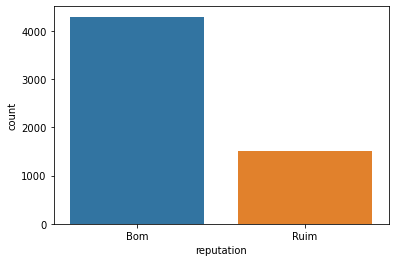

In [60]:
sns.countplot(ex['reputation']);


In [61]:
ex['reputation'].value_counts()

Bom     4299
Ruim    1507
Name: reputation, dtype: int64

In [77]:
len(ex.columns) # 0:74

75

In [79]:
X = ex.iloc[:, 0:74].values
X.shape

(5806, 74)

In [82]:
y = ex.iloc[:, 74].values
y.shape

(5806,)

In [83]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507], dtype=int64))

In [84]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, stratify = y)

In [85]:
X_treinamento.shape, y_teste.shape

((4644, 74), (1162,))

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
modelo = RandomForestClassifier()
modelo.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [89]:
previsoes = modelo.predict(X_teste)
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, y_teste)

0.7426850258175559

In [ ]:
# Undersampling

In [ ]:
# Oversampling